This notebook shows how to use the output from VASP DFPT calculation and the phonopy interface to plot the phonon bandstructure and density of states.

**Author**: Kiran Mathew

In [1]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19 phonopy

In [1]:
import os
import warnings

import numpy as np
import pymatgen.core as pmg
from phonopy import Phonopy
from phonopy.structure.atoms import Atoms as PhonopyAtoms
from pymatgen.io.vasp.outputs import Vasprun

%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning, module="pymatgen")

Set the structure

In [2]:
Si_primitive = PhonopyAtoms(
    symbols=["Si"] * 2,
    scaled_positions=[(0, 0, 0), (0.75, 0.5, 0.75)],
    cell=[
        [3.867422, 0.000000, 0.000000],
        [1.933711, 3.349287, 0.000000],
        [-0.000000, -2.232856, 3.157737],
    ],
)

# supercell size
scell = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]

Result from VASP DFPT calculations using the supercell structure

In [3]:
pmg_test_files_dir = os.path.join(
    os.path.dirname(pmg.__file__), "..", "..", "test_files"
)

vrun = Vasprun(os.path.join(pmg_test_files_dir, "vasprun.xml.dfpt.phonon"))

Initialize phonopy and set the force constants obtained from VASP

In [4]:
phonon = Phonopy(Si_primitive, scell)

# negative sign to ensure consistency with phonopy convention
phonon.set_force_constants(-vrun.force_constants)

Define the paths for plotting the bandstructure and set them in phonopy

In [5]:
bands = []

# path 1
q_start = np.array([0.5, 0.5, 0.0])
q_end = np.array([0.0, 0.0, 0.0])
band = []
for i in range(51):
    band.append(q_start + (q_end - q_start) / 50 * i)
bands.append(band)

# path 2
q_start = np.array([0.0, 0.0, 0.0])
q_end = np.array([0.5, 0.0, 0.0])
band = []
for i in range(51):
    band.append(q_start + (q_end - q_start) / 50 * i)
bands.append(band)

phonon.set_band_structure(bands)

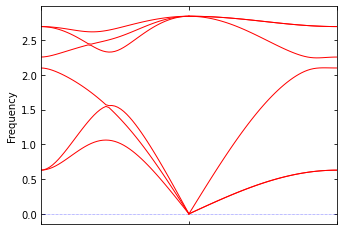

In [6]:
phonon.plot_band_structure().show()

Set the mesh in reciprocal space and plot DOS

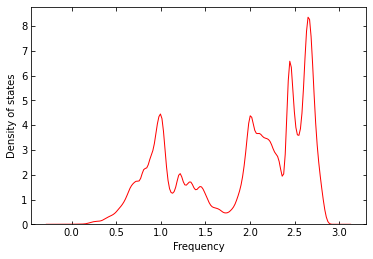

In [7]:
mesh = [31, 31, 31]
phonon.set_mesh(mesh)

phonon.set_total_DOS()
phonon.plot_total_DOS().show()